# hypothesis 1: republicans and democrats use religious speech different amounts

# load data and imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

tqdm.pandas()

In [2]:
DATA_PATH = "/data/laviniad/congress_errata/congress_df.json"
df = pd.read_json(DATA_PATH)
df['date'] = pd.to_datetime(df['date'].apply(str), format='%Y%m%d')
df['month'] = df['date'].dt.month

In [3]:
raw_df = df.copy()

In [4]:
df = raw_df

# filter

In [5]:
def is_dem_rep(t):
    return (t == 'Democrat') or (t == 'Republican')

def not_procedural_unknown_topic(x):
    return (not ('Procedural' in x)) and (not ('Unknown' in x))

def is_long(x, thresh=5): # takes string, whitespace heuristic
    return len(x.split()) > thresh

def is_in_range(x):
    return x in range(1995, 2023)

df = df[df['party'].progress_apply(is_dem_rep)]
#df = df[df['main_topic'].progress_apply(not_procedural_unknown_topic)]
df = df[df['year'].progress_apply(is_in_range)]
df = df[df['text'].progress_apply(is_long)]

 15%|█▌        | 202917/1328805 [00:00<00:01, 1022586.24it/s]

100%|██████████| 1182286/1182286 [00:21<00:00, 55535.37it/s]


In [6]:
print(f"Filtered out {len(raw_df) - len(df)} rows")
print(f"New length: {len(df)}")

Filtered out 147411 rows
New length: 1181394


In [7]:
print("Getting 118th Congress df")
df_118 = raw_df[raw_df['congress_num'] == 118]
df_118 = df_118[df_118['party'].progress_apply(is_dem_rep)]
df_118 = df_118[df_118['text'].progress_apply(is_long)]

Getting 118th Congress df


  0%|          | 0/25825 [00:00<?, ?it/s]

100%|██████████| 21289/21289 [00:00<00:00, 46077.89it/s]


# plotting cell

In [8]:
palette = {'Democrat': 'blue', 'Republican': 'red', 'New Progressive': 'grey', 'Popular Democrat': 'grey', 'Independence Party (Minnesota)': 'grey', 'Anti-Jacksonian': 'grey', 'Independent': 'green', 'unknown': 'black', 'Democrat Farmer Labor': 'blue'}
sns.set(context="notebook", font_scale=3, rc={'figure.figsize':(18,14), 'font.weight': 'normal'}, style='whitegrid')

# keyword analyses

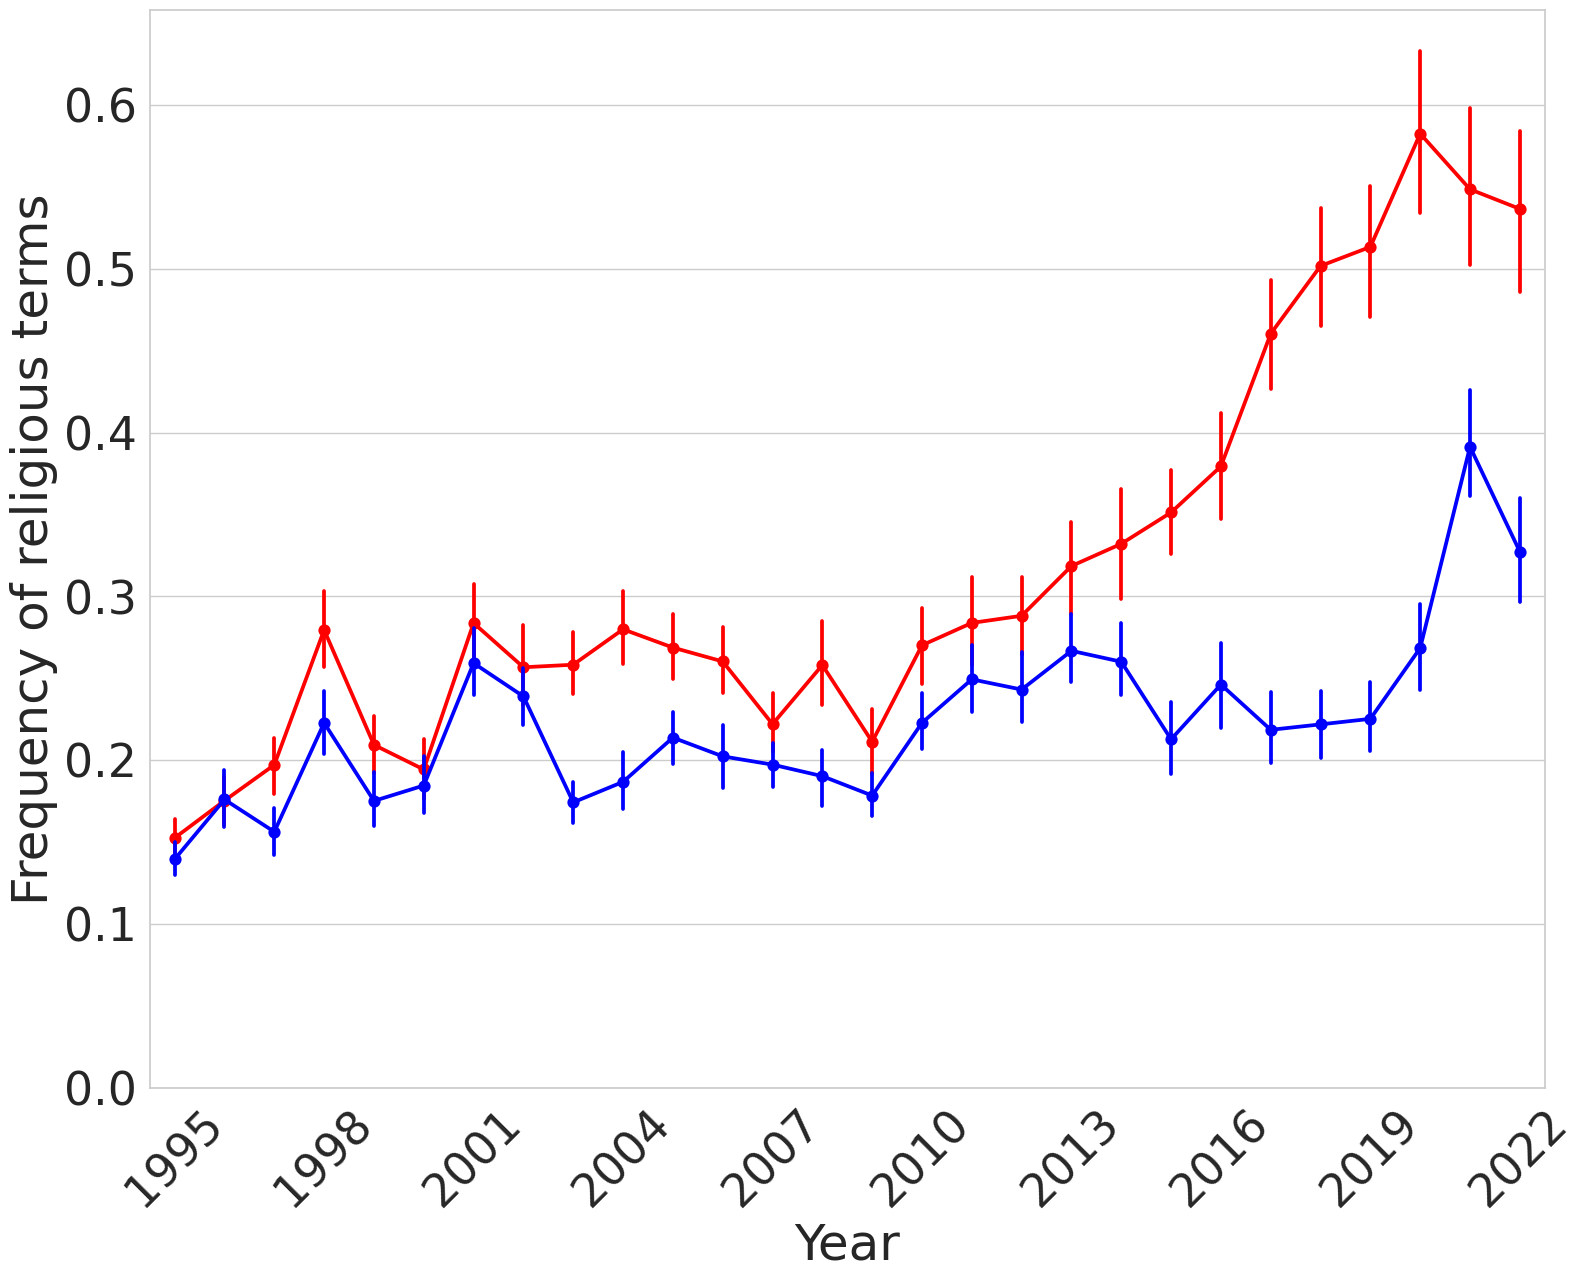

In [9]:
#plt.rcParams['font.weight'] = 'bold'
fig, ax = plt.subplots()

df['lexical_per_1000'] = df['lexical'] * 1000

plt.rcParams['font.weight'] = 'normal'
sns.pointplot(data=df, y='lexical_per_1000', x='year', hue='party', hue_order=['Republican', 'Democrat'], 
              palette=palette)
#sns.lineplot(data=res, y='lexical', x='year', color='black', ci=None)
#sns.pointplot(y=pres_num[:,3], x=pres_num[:,0], hue=pres_num[:,4])#, linestyle='none', errorbar=None)
plt.ylim(0, None)
#years = sorted(set(df['year']))
#ticks = list(range(min(years), max(years) + 1, 5))
#plt.xticks(ticks)

#plt.xlim(1995, 2023)
ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation=45)

plt.ylabel('Frequency of religious terms')
plt.xlabel('Year')
ax.get_legend().remove()
#plt.legend(title='Party', bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0)
plt.savefig("/home/laviniad/projects/religion_in_congress/notebooks/plots/new_plots/kw_rates_over_time.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
plt.savefig("/home/laviniad/projects/religion_in_congress/notebooks/plots/new_plots/kw_rates_over_time.pdf", format='pdf', dpi=300, bbox_inches='tight')

<Figure size 1800x1400 with 0 Axes>

In [12]:
print("Simple binary statistics: ")

speaker_binary = df.groupby(['speaker', 'party']).agg({'lexical': 'mean', 'binary_lex': 'any'}).reset_index()
print("% Democrats who use religious language: ", speaker_binary[speaker_binary['party'] == 'Democrat']['binary_lex'].mean() * 100)
print("% Republicans who use religious language: ", speaker_binary[speaker_binary['party'] == 'Republican']['binary_lex'].mean() * 100)

Simple binary statistics: 
% Democrats who use religious language:  72.24669603524228
% Republicans who use religious language:  79.28888888888889


In [13]:
df.head()

,bio_id,congress_num,year,date,chamber,speaker,text,month_code,month,gender,...,dw_nom_2,lexical,num_general,num_christian,length,binary_lex,full_state,state_perc_white,state_perc_black,lexical_per_1000
0,L000397,116,2019,2019-01-04,House,Ms. LOFGREN,"Ms. LOFGREN. Madam Speaker, I rise today to ho...",1,1,F,...,NaN,0.002558,1,0,391,True,California,0.715911,0.064752,2.557545
1,W000804,116,2019,2019-01-04,House,Mr. WITTMAN,"Mr. WITTMAN. Madam Speaker, I was not present ...",1,1,M,...,NaN,0.000000,0,0,49,False,Virginia,0.692282,0.199094,0.000000
2,S001201,116,2019,2019-01-04,House,Mr. SUOZZI,"Mr. SUOZZI. Madam Speaker, today is former Con...",1,1,M,...,NaN,0.000000,0,0,356,False,New York,0.694784,0.176012,0.000000
3,S001199,116,2019,2019-01-04,House,Mr. SMUCKER,"Mr. SMUCKER. Madam Speaker, I regret I was una...",1,1,M,...,NaN,0.000000,0,0,65,False,Pennsylvania,0.814942,0.12072,0.000000
4,U000031,116,2019,2019-01-04,House,Mr. UPTON,"Mr. UPTON. Madam Speaker, I was unavoidably de...",1,1,M,...,NaN,0.000000,0,0,154,False,Michigan,0.791632,0.141113,0.000000


In [14]:
# number of speeches containing religious kw
print("Percentage of speeches containing religious kw: ", df['binary_lex'].mean() * 100)
print("Number of speakers who never use religious keywords: ", len(speaker_binary[speaker_binary['binary_lex'] == False]))

# percentage of republican and dem speeches containing religious kw
print("Percentage of Republican speeches containing religious kw: ", df[df['party'] == 'Republican']['binary_lex'].mean() * 100)
print("Percentage of Democrat speeches containing religious kw: ", df[df['party'] == 'Democrat']['binary_lex'].mean() * 100)

Percentage of speeches containing religious kw:  6.234245306815508
Number of speakers who never use religious keywords:  548
Percentage of Republican speeches containing religious kw:  6.399441400185728
Percentage of Democrat speeches containing religious kw:  6.083198568849797


In [15]:
# rate of religious keyword use:

dem_df = df[df['party'] == 'Democrat']
rep_df = df[df['party'] == 'Republican']

dem_mean, dem_sd = (dem_df['lexical'] * 1000).mean(), (dem_df['lexical'] * 1000).std()
rep_mean, rep_sd = (rep_df['lexical'] * 1000).mean(), (rep_df['lexical'] * 1000).std()

print(f"Republicans use religious keywords at a rate of {rep_mean} pm {rep_sd} per a thousand words")
print(f"Democrats use religious keywords at a rate of {dem_mean} pm {dem_sd} per a thousand words")

Republicans use religious keywords at a rate of 0.28358651763240156 pm 1.739151942702 per a thousand words
Democrats use religious keywords at a rate of 0.21198227127847474 pm 1.387879831262017 per a thousand words


In [21]:
# are republican and democratic keyword rates significantly different?
from scipy.stats import ttest_ind

# perform t-test
stats = ttest_ind(dem_df['lexical'], rep_df['lexical'])
# print results
print("T-test statistic: ", stats.statistic)
print("P-value: ", stats.pvalue)
print("Degrees of freedom: ", stats.df)

T-test statistic:  -24.832021244129166
P-value:  4.38455401188822e-136
Degrees of freedom:  1181392.0


In [ ]:
# are republican and democratic inclusions of >0 religious keywords different? (see binary_lex, is 0 or 1)
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['party'], df['binary_lex'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic: ", chi2)
print("P-value: ", p)
print("Degrees of freedom: ", dof)

In [ ]:
print("Chi-squared significance test: ")

from scipy.stats import chi2_contingency

df['word_counts'] = df['num_general'] + df['num_christian']
contingency = pd.crosstab(df['party'], df['word_counts'])
c, p, dof, expected = chi2_contingency(contingency)
p
print("Chi-square statistic:", c)
print("p-value:", p)

Chi-squared significance test: 
Chi-square statistic: 392.16600503383944
p-value: 9.591784645086368e-38


: 

: 

In [ ]:
print("Correlation with year for each party: ")

print("Democrat: ", df[df['party'] == 'Democrat'][['year', 'lexical']].corr().iloc[0,1])
print("Republican: ", df[df['party'] == 'Republican'][['year', 'lexical']].corr().iloc[0,1])

# p-values of correlations
from scipy.stats import pearsonr
print("Democrat p-value: ", pearsonr(df[df['party'] == 'Democrat']['year'], df[df['party'] == 'Democrat']['lexical'])[1])
print("Republican p-value: ", pearsonr(df[df['party'] == 'Republican']['year'], df[df['party'] == 'Republican']['lexical'])[1])

Correlation with year for each party: 
Democrat:  0.022993310828472887
Republican:  0.05303709375186084
Democrat p-value:  5.980554445230635e-73
Republican p-value:  0.0


: 

: 

In [ ]:
# instead print as slope of line
from scipy.stats import linregress
print("Democrat slope: ", linregress(df[df['party'] == 'Democrat']['year'], df[df['party'] == 'Democrat']['lexical']).slope)
print("Republican slope: ", linregress(df[df['party'] == 'Republican']['year'], df[df['party'] == 'Republican']['lexical']).slope)

Democrat slope:  4.223761632925367e-06
Republican slope:  1.1737917081423829e-05


: 

: 

In [ ]:
# decadal averages

ranges = [(1995, 1999), (2000, 2009), (2010, 2019), (2020, 2022)]
rates_90 = {}
rates_20 = {}

for r in ranges:
    for p in ['Democrat', 'Republican']:
        relevant_rows = df[(df['year'] >= r[0]) & (df['year'] <= r[1])] # end-inclusive
        relevant_rows = relevant_rows[relevant_rows['party'] == p]
        rate_1000 = (relevant_rows['lexical'] * 1000).mean()
        if r[0] == 1995:
            rates_90[p] = rate_1000
        if r[0] == 2020:
            rates_20[p] = rate_1000

        print(f"Party {p} used religious KWs at rate of {rate_1000} per 1000 words in decade {r}")

for p in ['Democrat', 'Republican']:
    print(p)
    print(rates_20[p] / rates_90[p])

Party Democrat used religious KWs at rate of 0.16998627093653032 per 1000 words in decade (1995, 1999)
Party Republican used religious KWs at rate of 0.1982803374592688 per 1000 words in decade (1995, 1999)
Party Democrat used religious KWs at rate of 0.20233584673692473 per 1000 words in decade (2000, 2009)
Party Republican used religious KWs at rate of 0.247894545608053 per 1000 words in decade (2000, 2009)
Party Democrat used religious KWs at rate of 0.23716547536042326 per 1000 words in decade (2010, 2019)
Party Republican used religious KWs at rate of 0.37056749942763634 per 1000 words in decade (2010, 2019)
Party Democrat used religious KWs at rate of 0.33256012561685844 per 1000 words in decade (2020, 2022)
Party Republican used religious KWs at rate of 0.5560952060903023 per 1000 words in decade (2020, 2022)
Democrat
1.9563940298509763
Republican
2.8045907789749283


: 

: 

# uses of god

In [ ]:
# how many speakers use any religious language at all?

speakers_with_nonzero_lex = df[df['lexical'] > 0]['speaker'].unique()

: 

In [ ]:
# how many speakers use "god"?
import sys
sys.path.append('/home/laviniad/projects/religion_in_congress')
from data.data_utils import tokenizer

def find_god(x):
    return 'God' in tokenizer.tokenize(x)


speakers_with_god = df[df['text'].apply(find_god)]['speaker'].unique()

Loaded 100 keywords from /home/laviniad/projects/religion_in_congress/src/keywords/keywords_from_coca.txt
Loaded 150 keywords from /home/laviniad/projects/religion_in_congress/src/keywords/keywords_from_congress_FINAL.txt
God tokens: ['god', 'immortal', 'deity', 'idol', 'God', 'divinity']
Jesus tokens: ['Christ', 'Jesus', 'Deliverer', 'Saviour', 'Savior', 'Redeemer']
Full keyword list length: 165


: 

In [ ]:
# find five-grams including "god" in text
NUM = 5

def god_n_grams(x):
    tokenized = tokenizer.tokenize(x)
    n_grams = []
    for i in range(len(tokenized) - (NUM - 1)):
        n_gram = tokenized[i:i+NUM]
        if 'God' in n_gram:
            n_grams.append(n_gram)

    return n_grams


df['god_n_grams'] = df['text'].apply(god_n_grams)

# find unique n-grams
god_n_grams_and_counts = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    for n_gram in row['god_n_grams']:
        n_gram = ' '.join(n_gram)
        if n_gram not in god_n_grams_and_counts:
            god_n_grams_and_counts[n_gram] = 1
        else:
            god_n_grams_and_counts[n_gram] += 1

# sort by counts
sorted_god_n_grams = sorted(god_n_grams_and_counts.items(), key=lambda x: x[1], reverse=True)


100%|██████████| 1181394/1181394 [00:35<00:00, 32957.92it/s]


: 

In [ ]:
import pickle as pkl
NGRAM_GOD_PATH = "/home/laviniad/projects/religion_in_congress/notebooks/god_n_grams.pkl"

: 

In [ ]:
with open(NGRAM_GOD_PATH, 'wb') as f:
    pkl.dump(sorted_god_n_grams, f)

: 

# analyze god n-grams

In [ ]:
with open(NGRAM_GOD_PATH, 'rb') as f:
    sorted_god_n_grams = pkl.load(f)

: 

In [ ]:
# filter sorted_god_n_grams to only include those with "God" in the middle, i.e. at the third position
NUM = 5

god_n_grams_middle = {}
for n_gram, count in sorted_god_n_grams:
    n_gram = n_gram.split()
    if len(n_gram) == NUM and n_gram[2] == 'God':
        n_gram = '_'.join(n_gram)
        god_n_grams_middle[n_gram] = count

ngram_insts = []
for n_gram, count in god_n_grams_middle.items():
    for i in range(count):
        ngram_insts.append(n_gram)

ngram_insts = pd.Series(ngram_insts)

# how many 5-grams are unique
unique_ngrams = ngram_insts.unique()
print(f"Number of unique 5-grams with 'God' in the middle: {len(unique_ngrams)}")

Number of unique 5-grams with 'God' in the middle: 29138


: 

In [ ]:
# convert ngram_insts to numerical index
ngram_insts = ngram_insts.str.replace(' ', '_')
index = {'_'.join(ngram.split('_')): i for i, ngram in enumerate(ngram_insts.unique())}
ngram_insts = ngram_insts.map(index)
ngram_insts = list(ngram_insts.values)

: 

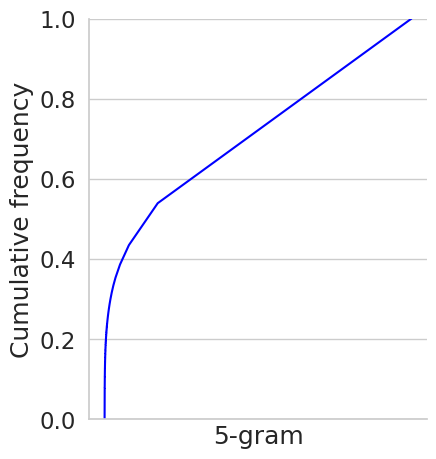

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {'Democrat': 'blue', 'Republican': 'red', 'New Progressive': 'grey', 'Popular Democrat': 'grey', 'Independence Party (Minnesota)': 'grey', 'Anti-Jacksonian': 'grey', 'Independent': 'green', 'unknown': 'black', 'Democrat Farmer Labor': 'blue'}
sns.set(context="notebook", font_scale=1.5, rc={'figure.figsize':(18,14), 'font.weight': 'normal'}, style='whitegrid')

data = ngram_insts
xlabel = '5-gram'
ylabel = 'Cumulative frequency'
save_path = '/home/laviniad/projects/religion_in_congress/plots/god_ngram_counts_distribution.pdf'
#sns.displot(data, color='blue', kind='hist', bins=100, stat='density')
sns.displot(data, color='blue', kind='ecdf')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
# remove xticks
plt.xticks([])
#plt.xlim(0, 1000)
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()

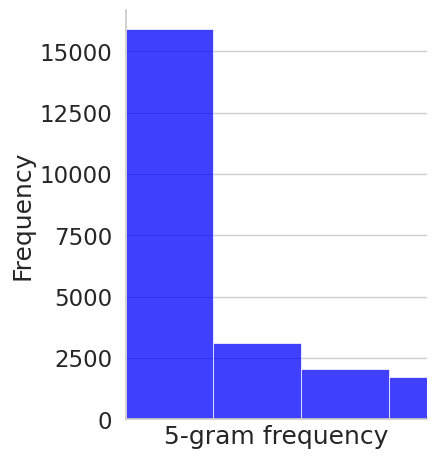

: 

In [ ]:
# distribution of n-grams

import matplotlib.pyplot as plt
import seaborn as sns

# distribution of n-grams -- use sns.displot

palette = {'Democrat': 'blue', 'Republican': 'red', 'New Progressive': 'grey', 'Popular Democrat': 'grey', 'Independence Party (Minnesota)': 'grey', 'Anti-Jacksonian': 'grey', 'Independent': 'green', 'unknown': 'black', 'Democrat Farmer Labor': 'blue'}
sns.set(context="notebook", font_scale=1.5, rc={'figure.figsize':(18,14), 'font.weight': 'normal'}, style='whitegrid')

data = ngram_insts
xlabel = '5-gram frequency'
ylabel = 'Frequency'
save_path = '/home/laviniad/projects/religion_in_congress/plots/god_ngram_counts_distribution.pdf'
sns.displot(data, color='blue', kind='hist', bins=50)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
# remove xticks
plt.xticks([])
plt.xlim(0, 2000)
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
prop_nonzero_lex = len(speakers_with_nonzero_lex) / len(df['speaker'].unique())
prop_god = len(speakers_with_god) / len(df['speaker'].unique())

: 

In [ ]:
print("Proportion who use religious words at some point: ", round(prop_nonzero_lex, 2), "\nProportion who use \'God\' at some point: ", round(prop_god, 2))

Proportion who use religious words at some point:  0.76 
Proportion who use 'God' at some point:  0.67


: 

In [ ]:
kws = "Abed\-nego, abideth, Abram, adul\-ter\-ers, Ahab, AMEN, Ana\-nias, apos\-tle, apos\-tles, Aren, ark, Baal, Bap\-tism, Be\-liev\-ers, be\-lieveth, Beth\-phage, Bible, Boaz, bride\-groom, Ca\-iaphas, cen\-tu\-ri\-on, Cephas, Christ, Chron, Colos\-sians, con\-ceit\-ed, Cor, Corinthi\-ans, cov\-etous\-ness, De\-ity, De\-liv\-er\-er, dis\-ci\-ple, dis\-ci\-ples, dis\-obe\-di\-ent, dis\-sen\-sions, Di\-vin\-i\-ty, doeth, dwelleth, Eph\-esians, Eph\-esus, faith, FAITH, Gala\-tia, Gala\-tians, Galilee, GEN\-E\-SIS, Gen\-tiles, God, GOD, god\-less\-ness, god\-li\-ness, God\-li\-ness, god\-ly, God\-ly, Habakkuk, Haman, Ha\-ran, hast, He\-brews, Herod, Him, Him\-self, ho\-li\-ness, Idol, idol\-a\-try, Im\-mor\-tal, im\-per\-ish\-able, in\-iq\-ui\-ties, in\-iq\-ui\-ty, Isa, Is\-raelites, Jabez, Jeph\-thah, Je\-sus, Jezebel, Joab, Ju\-dah, Ju\-das, KJV, knoweth, le\-gal\-ism, Lep\-rosy, Levite, liveth, Lystra, Ma\-gi, meek\-ness, MER\-CY, Me\-shach, Mes\-si\-ah, NASB, Neb\-uchad\-nez\-zar, Ne\-he\-mi\-ah, Obe\-di\-ence, Olives, OUR, para\-ble, Para\-ble, para\-bles, par\-tak\-ers, Pen\-te\-cost, Pharaoh, Phar\-isees, Philip\-pi, Philip\-pi\-an, Philip\-pi\-ans, Philis\-tine, Philistines, Pi\-late, pray, prayed, prayer, pray\-ing, prophets, Prophets, Ra\-hab, Re\-deemer, re\-pen\-tance, Re\-pen\-tance, res\-ur\-rec\-tion, Rev\-e\-la\-tion, righ\-teous\-ness, Righ\-teous\-ness, Rom, sack\-cloth, saith, sal\-va\-tion, sanc\-ti\-fi\-ca\-tion, San\-hedrin, Sa\-tan, Sav\-ior, Saviour, scoffers, seeth, Ser\-mon, Shadrach, sin\-ful, sin\-ful\-ness, sin\-ner, sin\-ners, Sodom, sow\-er, Sow\-er, spake, Swin\-doll, taber\-na\-cle, Thes\-sa\-lo\-ni\-ans, un\-be\-lief, un\-be\-liev\-er, un\-be\-liev\-ers, un\-be\-liev\-ing, un\-de\-filed, un\-fruit\-ful, un\-god\-li\-ness, un\-righ\-teous, un\-righ\-teous\-ness, Ver\-i\-ly, whoso\-ev\-er, wicked\-ness, william, wine\-skins, Your\-selves, Za\-c\-cha\-eus, Zechari\-ah, Zedeki\-ah"
kws = [e.replace("\-", "") for e in kws.split(", ")]

from data.data_utils import full_keywords

<>:1: SyntaxWarning: invalid escape sequence '\-'
<>:2: SyntaxWarning: invalid escape sequence '\-'
<>:1: SyntaxWarning: invalid escape sequence '\-'
<>:2: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipykernel_349083/92448771.py:1: SyntaxWarning: invalid escape sequence '\-'
  kws = "Abed\-nego, abideth, Abram, adul\-ter\-ers, Ahab, AMEN, Ana\-nias, apos\-tle, apos\-tles, Aren, ark, Baal, Bap\-tism, Be\-liev\-ers, be\-lieveth, Beth\-phage, Bible, Boaz, bride\-groom, Ca\-iaphas, cen\-tu\-ri\-on, Cephas, Christ, Chron, Colos\-sians, con\-ceit\-ed, Cor, Corinthi\-ans, cov\-etous\-ness, De\-ity, De\-liv\-er\-er, dis\-ci\-ple, dis\-ci\-ples, dis\-obe\-di\-ent, dis\-sen\-sions, Di\-vin\-i\-ty, doeth, dwelleth, Eph\-esians, Eph\-esus, faith, FAITH, Gala\-tia, Gala\-tians, Galilee, GEN\-E\-SIS, Gen\-tiles, God, GOD, god\-less\-ness, god\-li\-ness, God\-li\-ness, god\-ly, God\-ly, Habakkuk, Haman, Ha\-ran, hast, He\-brews, Herod, Him, Him\-self, ho\-li\-ness, Idol, idol\-a\-try, Im\-mor\-t

: 

# LR analyses

In [ ]:
print("Correlation between avg LR and lexical")

print(df[['avg_lr_prob', 'lexical']].corr())

Correlation between avg LR and lexical


KeyError: "['avg_lr_prob'] not in index"

: 

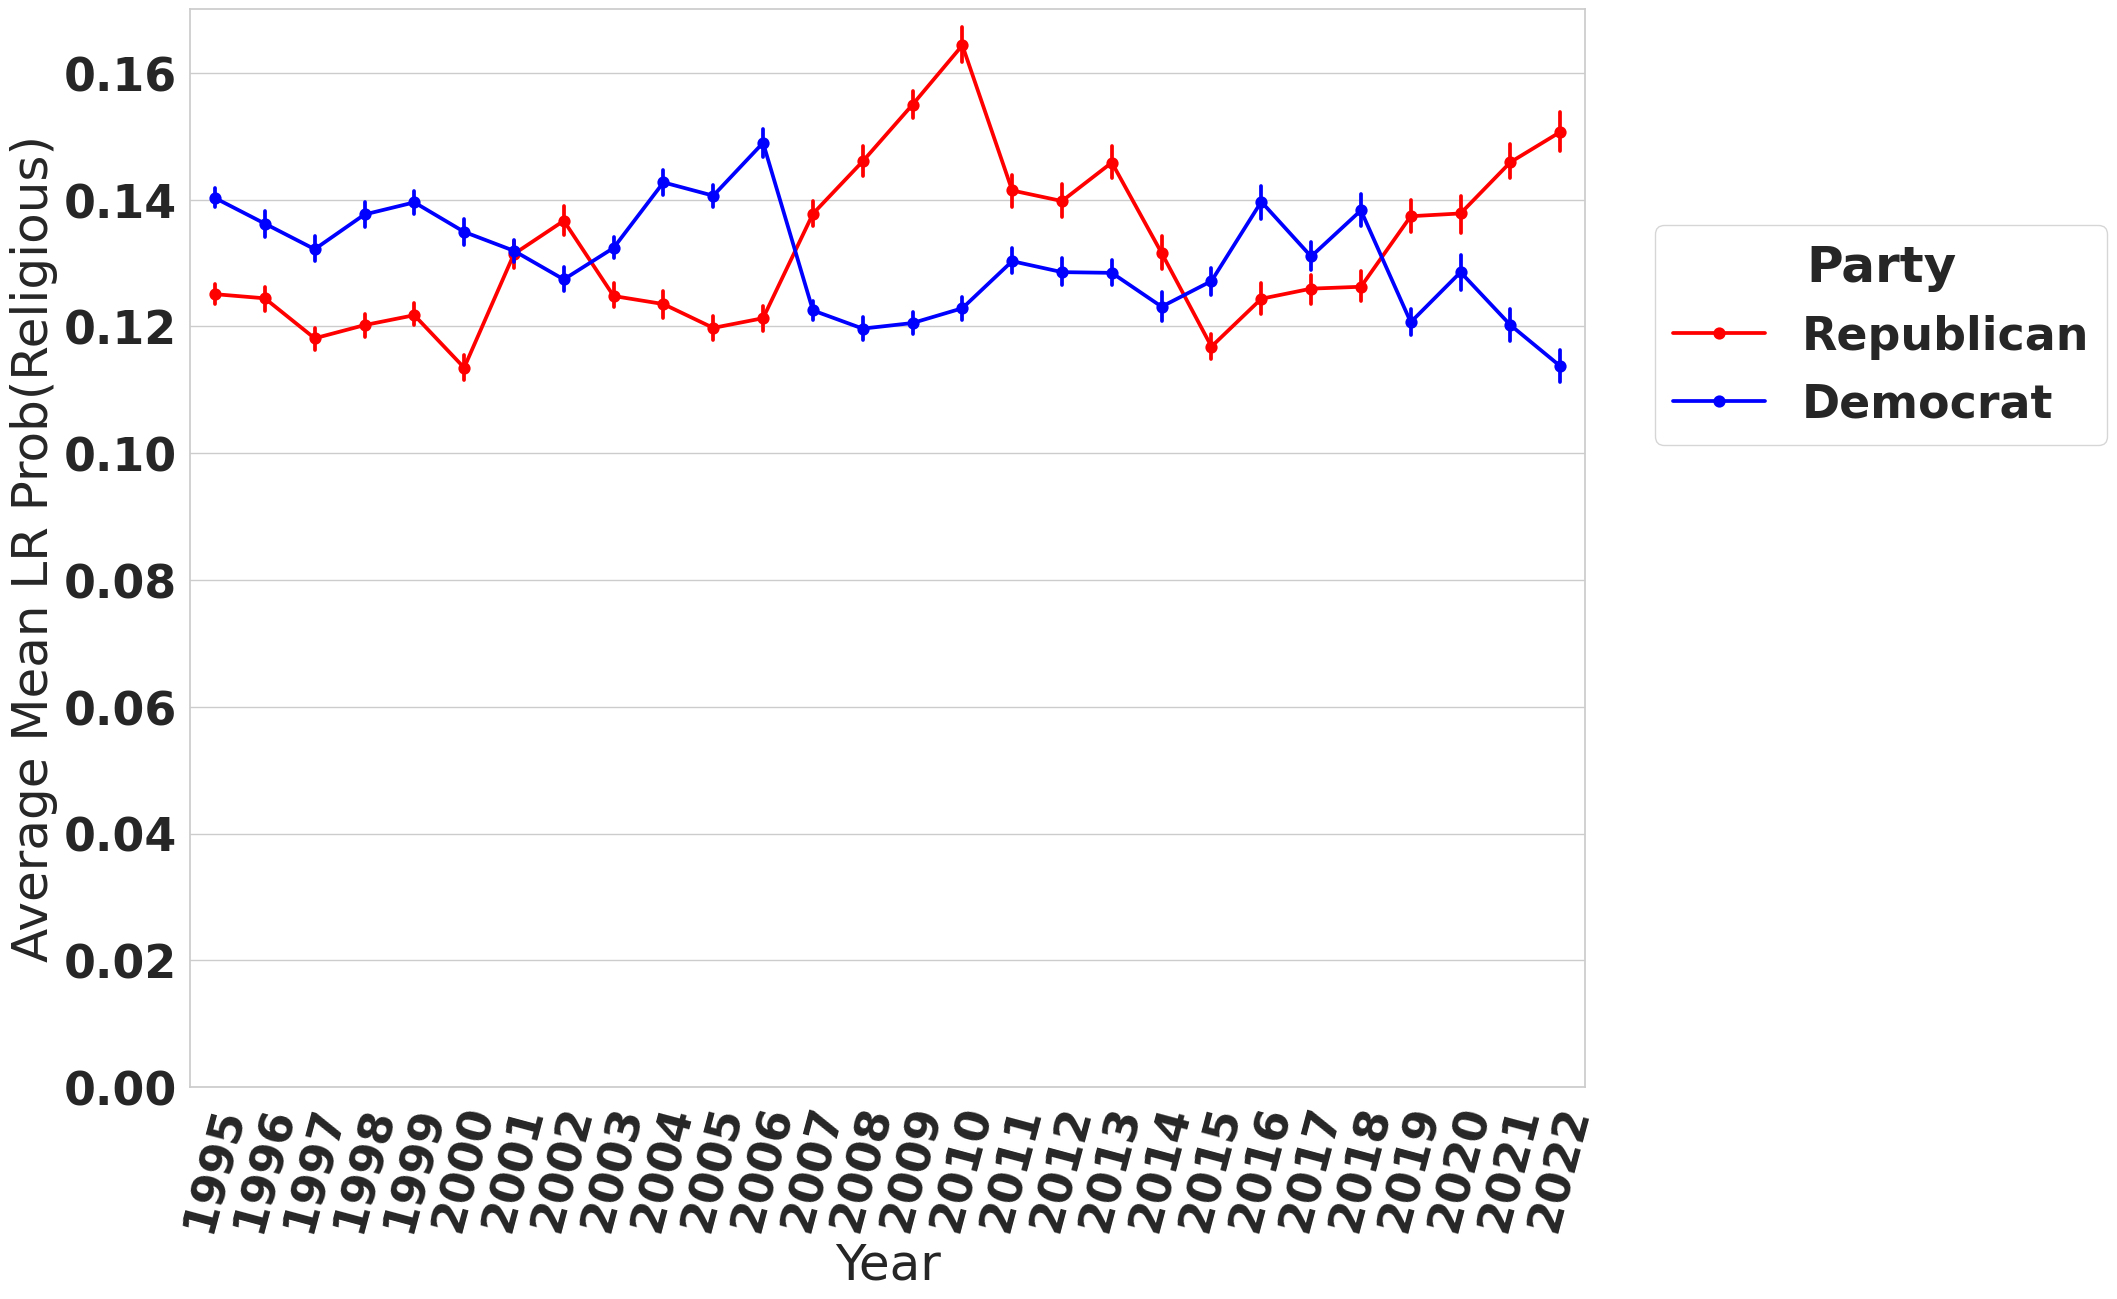

: 

In [ ]:
sns.pointplot(data=df, y='avg_lr_prob', x='year', hue='party', hue_order=['Republican', 'Democrat'], palette=palette)
#sns.lineplot(data=res, y='lexical', x='year', color='black', ci=None)
#sns.pointplot(y=pres_num[:,3], x=pres_num[:,0], hue=pres_num[:,4])#, linestyle='none', errorbar=None)
plt.ylim(0, None)
plt.xticks(rotation=75)
plt.ylabel('Average Mean LR Prob(Religious)')
plt.xlabel('Year')
plt.legend(title='Party', bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
plt.show()

<Axes: xlabel='length', ylabel='avg_lr_prob'>

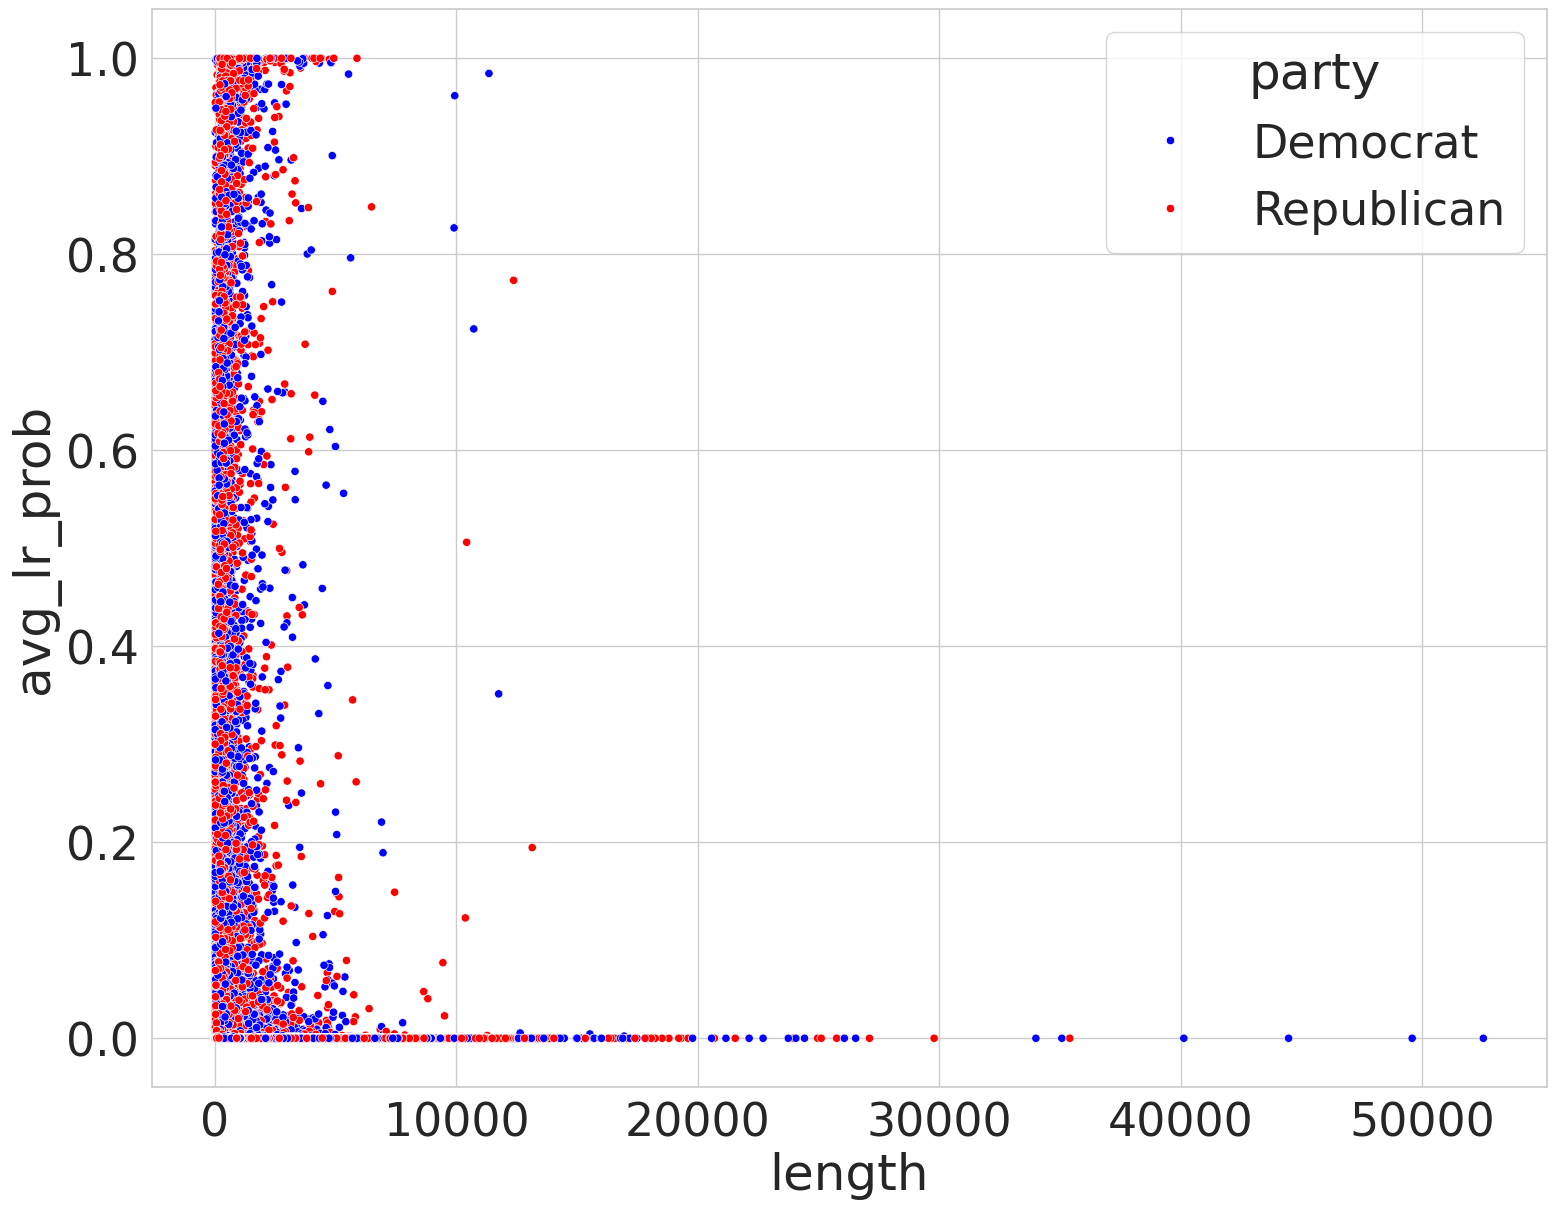

: 

In [ ]:
# plot length of speech vs. avg_lr_prob

sns.scatterplot(data=df, x='length', y='avg_lr_prob', hue='party', palette=palette)

Text(0.5, 0, 'Speaker-level average religious keyword rate')

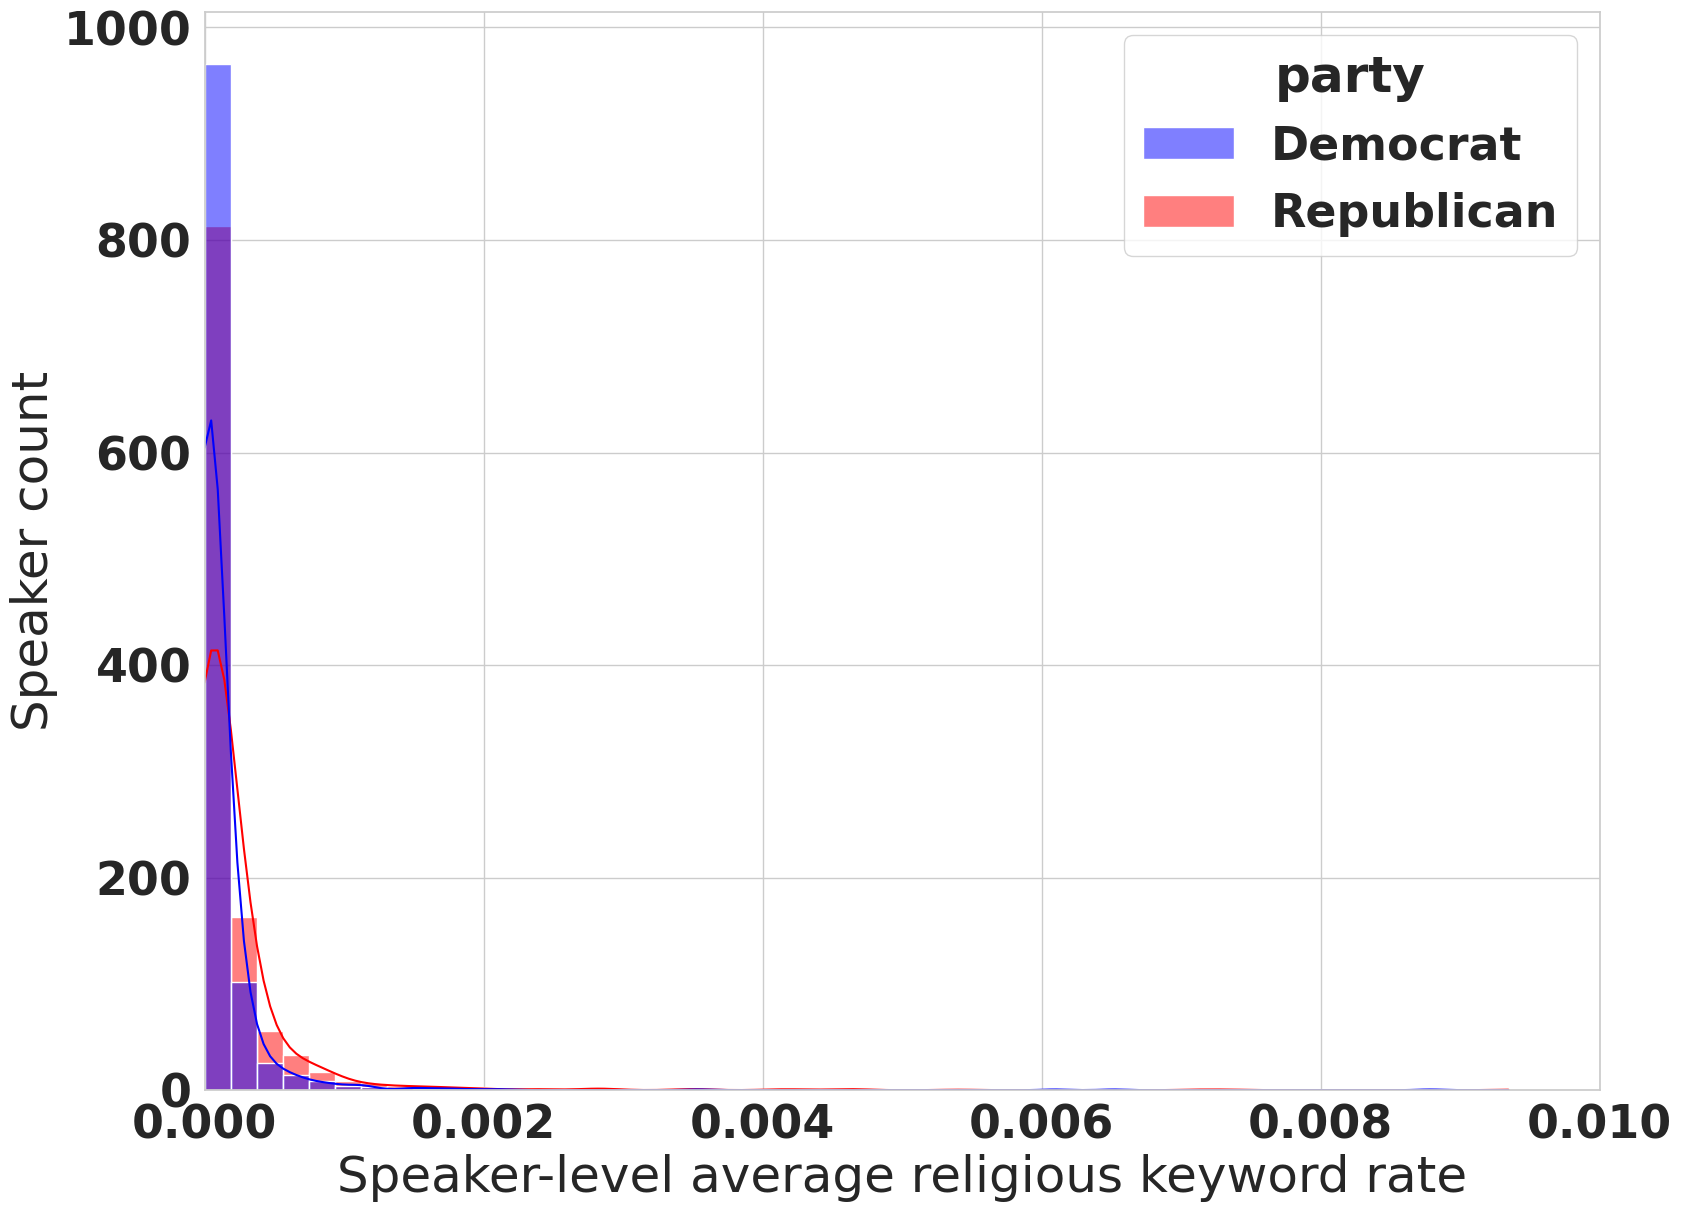

: 

In [ ]:
# dist of average lex
speaker_binary = df.groupby(['speaker', 'party']).agg({'lexical': 'mean', 'binary_lex': 'any'}).reset_index()
sns.histplot(data=speaker_binary, x='lexical', hue='party', palette=palette, kde=True, bins=50, common_norm=False)
plt.xlim(0, 0.01)
plt.ylabel("Speaker count")
plt.xlabel("Speaker-level average religious keyword rate")